In [17]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [18]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [19]:
print(train_images.shape[1:])

(28, 28)


In [20]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [21]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
#train_data /=255.0
#test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Without all of the scaling it did not do as well but still didn't do terribly. <br/>
without just (train_data /=255.0 and test_data /=255.0)   it did slightly better than the above but didnt do as well when we had it.
             

In [22]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 4.9390 - accuracy: 0.8795 - val_loss: 0.8486 - val_accuracy: 0.9178
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.4000 - accuracy: 0.9458 - val_loss: 0.4810 - val_accuracy: 0.9215
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2367 - accuracy: 0.9595 - val_loss: 0.4796 - val_accuracy: 0.9361
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1922 - accuracy: 0.9666 - val_loss: 0.3689 - val_accuracy: 0.9405
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1654 - accuracy: 0.9715 - val_loss: 0.3920 - val_accuracy: 0.9514
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1514 - accuracy: 0.9756 - val_loss: 0.2732 - val_accuracy: 0.9649
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1485 - accuracy: 0.9780 - val_loss: 0.2955 - val_accuracy: 0.9686

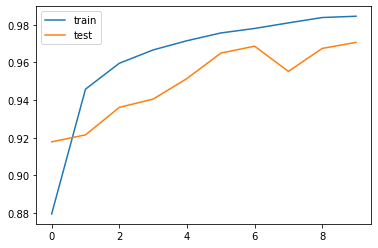

In [24]:
##ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

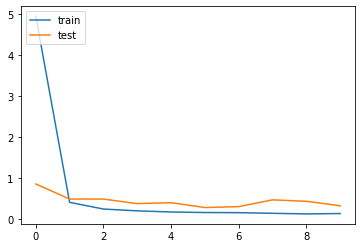

In [25]:
## LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
model.predict_classes(test_data[503].reshape(1,784))

array([2])

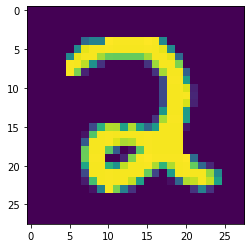

In [27]:
plt.imshow(test_data[503].reshape(28,28))

In [28]:
model.predict_classes(test_data[523].reshape(1,784))

array([1])

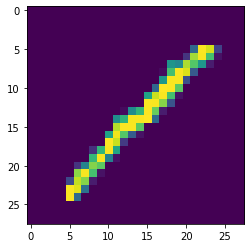

In [29]:
plt.imshow(test_data[523].reshape(28,28))

In [30]:
model.predict_classes(test_data[221].reshape(1,784))

array([2])

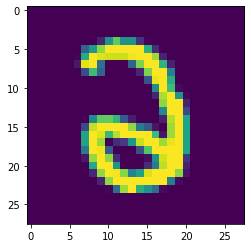

In [31]:
plt.imshow(test_data[221].reshape(28,28))